In [5]:
from google.colab import auth
import gspread
from google.auth import default

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential as Seq
from tensorflow.keras.layers import Dense as Den
from tensorflow.keras.metrics import RootMeanSquaredError as rmse

In [6]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

sheet = gc.open('StudentsData').sheet1 
rows = sheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'int'})
df = df.astype({'output':'int'})

In [7]:
x = df[["input"]] .values
y = df[["output"]].values

In [8]:
scaler = MinMaxScaler()
scaler.fit(x)
x_n = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_n,y,test_size = 0.3,random_state = 3)

In [9]:
ai = Seq([
    Den(8,activation = 'relu',input_shape=[1]),
    Den(15,activation = 'relu'),
    Den(1),
])

ai.compile(optimizer = 'rmsprop',loss = 'mse')

ai.fit(x_train,y_train,epochs=2000)
ai.fit(x_train,y_train,epochs=2000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 5ms/step - loss: 10057.5068
Epoch 858/2000
1/1 [==============================] - 0s 15ms/step - loss: 10046.5557
Epoch 859/2000
1/1 [==============================] - 0s 5ms/step - loss: 10035.5908
Epoch 860/2000
1/1 [==============================] - 0s 5ms/step - loss: 10024.6113
Epoch 861/2000
1/1 [==============================] - 0s 5ms/step - loss: 10013.6201
Epoch 862/2000
1/1 [==============================] - 0s 6ms/step - loss: 10002.6162
Epoch 863/2000
1/1 [==============================] - 0s 5ms/step - loss: 9991.5996
Epoch 864/2000
1/1 [==============================] - 0s 5ms/step - loss: 9980.5693
Epoch 865/2000
1/1 [==============================] - 0s 5ms/step - loss: 9969.5254
Epoch 866/2000
1/1 [==============================] - 0s 10ms/step - loss: 9958.4707
Epoch 867/2000
1/1 [==============================] - 0s 6ms/step - loss: 9947.4014
Epoch 868/2000
1/1 [============

<Axes: >

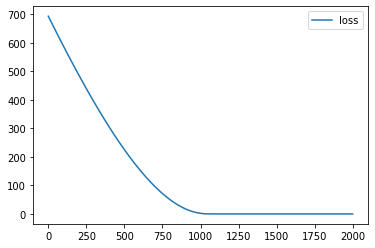

In [10]:
loss_plot = pd.DataFrame(ai.history.history)
loss_plot.plot()

In [11]:
err = rmse()
preds = ai.predict(x_test)
err(y_test,preds)

1/1 [==============================] - 0s 171ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.0975733>

In [12]:
x_n1 = [[30]]
x_n_n = scaler.transform(x_n1)
ai.predict(x_n_n)

1/1 [==============================] - 0s 51ms/step


array([[300.7513]], dtype=float32)